<a href="https://colab.research.google.com/github/sebastian122H/Rasselbande/blob/main/Python_for_Data_Science_Die_Rasselbande.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is the relationship between budget and Revenue?






In [372]:
##These are all necessary packages that need to be installed for the Code to function
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 
import seaborn as sns

# Data Cleaning and String Check

In [392]:
#This code reads the CSV file with the data points in it
df = pd.read_csv("tmdb_movies_data.csv")
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/2015,425,6.4,2015,0.0,2.700677e+07
1,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,09.03.15,474,6.2,2015,0.0,2.056620e+07
2,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/2015,81,5.5,2015,0.0,4.222338e+04
3,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/2015,27,5.1,2015,0.0,0.000000e+00
4,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,06.12.15,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,1452,tt0348150,1.957331,270000000,391081192,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,http://www.superman.com,Bryan Singer,NaN,...,"Set 5 years after the end of Superman II, the ...",154,Adventure|Fantasy|Action|Science Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,6/28/2006,834,5.3,2006,292050672.7,4.230205e+08
10862,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,A New Age Has Come.,...,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/2015,4304,7.4,2015,257599886.7,1.292632e+09
10863,285,tt0449088,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,http://disney.go.com/disneypictures/pirates/,Gore Verbinski,"At the end of the world, the adventure begins.",...,"Captain Barbossa, long believed to be dead, ha...",169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/2007,2626,6.8,2007,315500574.8,1.010654e+09
10864,1865,tt1298650,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,http://disney.go.com/pirates/index-on-stranger...,Rob Marshall,Live Forever Or Die Trying.,...,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,05.11.11,3180,6.3,2011,368371256.2,9.904175e+08


In [393]:
#This code shows the columns of the data frame of out data
df.columns


Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [394]:
#From this code we drop the unused columns that we do not require for our analysis
df.drop(['imdb_id', 'id', 'popularity', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies','release_date',
       'vote_count', 'vote_average'],axis = 1, inplace=True)

In [395]:
#To ensure we have the right data types for the analysis we check the types of data that are contained in the columns
df.dtypes

budget            int64
revenue           int64
release_year      int64
budget_adj      float64
revenue_adj     float64
dtype: object

In [396]:
#Just a quick check to see how everything is going
df

,budget,revenue,release_year,budget_adj,revenue_adj
0,0,29355203,2015,0.0,2.700677e+07
1,0,22354572,2015,0.0,2.056620e+07
2,0,45895,2015,0.0,4.222338e+04
3,0,0,2015,0.0,0.000000e+00
4,0,0,2015,0.0,0.000000e+00
...,...,...,...,...,...
10861,270000000,391081192,2006,292050672.7,4.230205e+08
10862,280000000,1405035767,2015,257599886.7,1.292632e+09
10863,300000000,961000000,2007,315500574.8,1.010654e+09
10864,380000000,1021683000,2011,368371256.2,9.904175e+08


In [397]:
#Now we drop and replace all values that represent 0, with a Nan value, which we then drop all at once. The reason for this is that it is impossible
#for a movie to have absolutely 0 units of budgets, as well as it being unrealistic to assume that any movie created and judged by IMDB has a revenue of 0.

df = df.replace([np.inf, -np.inf, 0], np.nan)


df = df.dropna(axis = 0)

df


,budget,revenue,release_year,budget_adj,revenue_adj
5697,1.0,1.000000e+02,1999.0,1.309053e+00,1.309053e+02
5699,1.0,1.378000e+03,2011.0,9.693980e-01,1.335831e+03
5700,2.0,1.600000e+01,1982.0,4.519285e+00,3.615428e+01
5701,3.0,4.300000e+01,2010.0,3.000000e+00,4.300000e+01
5703,3.0,1.600000e+01,1990.0,5.006696e+00,2.670238e+01
...,...,...,...,...,...
10861,270000000.0,3.910812e+08,2006.0,2.920507e+08,4.230205e+08
10862,280000000.0,1.405036e+09,2015.0,2.575999e+08,1.292632e+09
10863,300000000.0,9.610000e+08,2007.0,3.155006e+08,1.010654e+09
10864,380000000.0,1.021683e+09,2011.0,3.683713e+08,9.904175e+08


In [398]:
#Here we creaeted a string check that looks through all the columns and from there on decides if the value it identifies is a string or not.
#If it is a string then that data point will be dropped from the data frame.
#Once all the strings are removed from the data frame then the code will return a "success" message.
def str_check(column): 
  for i in range(1, len(df.budget)):
    if df.loc(i,) == str:

      df.replace(df.id(i), np.nan)
      df.dropna(how='all', axis=0)
      df

    else:

      return print("success")

def column_list():

  dict_column = {
      1:"id", 2:"budget", 3:"revenue", 4:"release_year", 5:"budget_adj", 6:"revenue_adj"
      }

  for i in range (1,6):
    str_check(dict_column[i])
    return 



column_list()

success


With this success we have made our Data sqeuky clean and it is ready to be vizualised :)

# Vizualisation

In [399]:
##Description of the current data frame, with most important statistics for each column
df.describe()

,budget,revenue,release_year,budget_adj,revenue_adj
count,3.855000e+03,3.855000e+03,3855.000000,3.855000e+03,3.855000e+03
mean,3.720183e+07,1.076589e+08,2001.263294,4.423630e+07,1.370294e+08
std,4.220291e+07,1.765248e+08,11.281989,4.480403e+07,2.160944e+08
min,1.000000e+00,2.000000e+00,1960.000000,9.693980e-01,2.370705e+00
25%,1.000000e+07,1.357645e+07,1995.000000,1.309053e+07,1.834123e+07
50%,2.400000e+07,4.479322e+07,2004.000000,3.001558e+07,6.171861e+07
75%,5.000000e+07,1.241530e+08,2010.000000,6.061307e+07,1.632401e+08
max,4.250000e+08,2.781506e+09,2015.000000,4.250000e+08,2.827124e+09


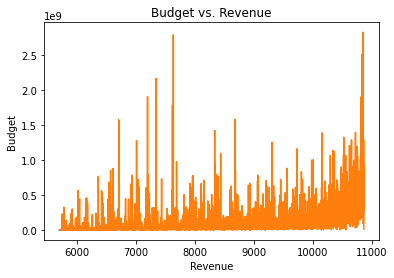

In [400]:
##Line Graph of Budget vs. Revenue 
plt.plot(df[["budget_adj", "revenue_adj"]])
plt.title('Budget vs. Revenue')
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.show()

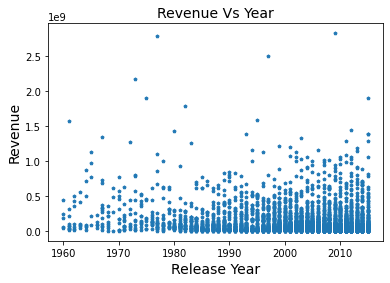

In [401]:
##Scatter plot showing the Revenue from every release year, 
##showing an increase in movies over the past 60 years, and increase in their reveune
plt.scatter(df['release_year'], df['revenue_adj'], marker='p', s=10) 
plt.title('Revenue Vs Year', fontsize=14)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.show()

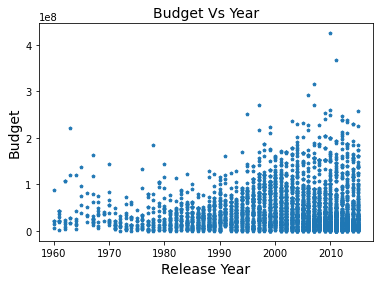

In [402]:
##Time Series plot of budget_adj showing the increase in budget spent on movies over the past 60 years.
plt.scatter(df['release_year'], df['budget_adj'], marker='p', s=10) 
plt.title('Budget Vs Year', fontsize=14)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Budget', fontsize=14)

plt.show()

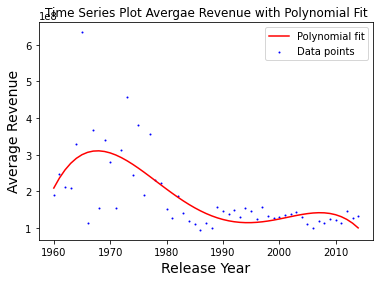

In [403]:
## Time Series Plot with Avergae Revenue Per year
## We can see some Heteroscedascitiy of the Scatter plot, which becomes more exact over time
Y_data = []
X_data = []
for i in range(1960,2015):
    Y_data.append(df.loc[df['release_year'] == i, 'revenue_adj'].mean())
    X_data.append(i)

params= np.polyfit(X_data, Y_data, deg=4)
fit = np.polyval(params, X_data)

fig, ax1 = plt.subplots()
ax1.scatter(X_data, Y_data, s=1, color='b', label='Data points')
ax1.plot(X_data, fit, color='r', alpha=1, label='Polynomial fit')
    
ax1.set_title('Time Series Plot Avergae Revenue with Polynomial Fit')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Average Revenue', fontsize=14)
ax1.legend()
plt.show()


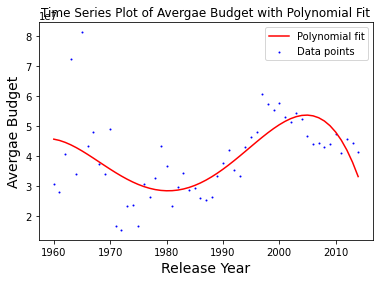

In [404]:
## Time Series Plot with Avergae Budget Per year

Y_data = []
X_data = []
for i in range(1960,2015):
    Y_data.append(df.loc[df['release_year'] == i, 'budget_adj'].mean())
    X_data.append(i)

params= np.polyfit(X_data, Y_data, deg=4)
fit = np.polyval(params, X_data)

fig, ax1 = plt.subplots()
ax1.scatter(X_data, Y_data, s=1, color='b', label='Data points')
ax1.plot(X_data, fit, color='r', alpha=1, label='Polynomial fit')
    
ax1.set_title('Time Series Plot of Avergae Budget with Polynomial Fit')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Avergae Budget', fontsize=14)
ax1.legend()
plt.show()

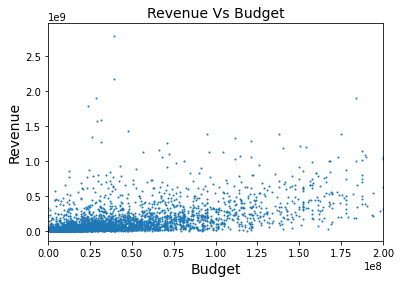

In [405]:
## Scatter plot representing adjusted revneue vs. adjusted budget
plt.scatter(df['budget_adj'], df['revenue_adj'], marker='o', s=1) 
plt.title('Revenue Vs Budget', fontsize=14)
plt.xlabel('Budget', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.xlim(0, 2 * (10**8))

plt.show()

Text(0.5, 0, 'Budget and Revenue Frequency')

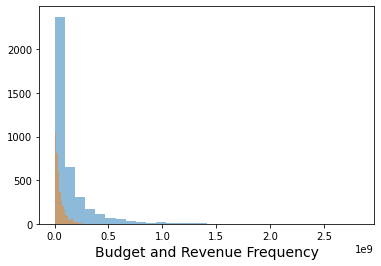

In [406]:
## Two histograms plotted on top of each other to represent the frequency of how much a movie made with a certain budget
plt.hist(df["revenue_adj"], bins = 30, alpha = 0.5)
plt.hist(df["budget_adj"], bins = 30, alpha = 0.5)
plt.xlabel('Budget and Revenue Frequency', fontsize=14)



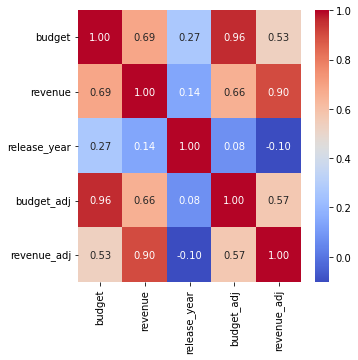

In [407]:
## Heat map representing the correlation of all different variables agaisnt each other.
## We see that the adjustment of budget and revnue works as thesea re highly correlated
## Additonally we see a correlation present between adjusted bduget and adjusted revenue.
corr = df.corr()
corr
figure = plt.figure(figsize=(5,5)) 
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt="0.2f")

In [408]:
#T-test and OLS Regression: Budget_adj vs. revenue_adj

x = df["budget_adj"]
y = df["revenue_adj"]

x2 = sm.add_constant(x)
est = sm.OLS(y,x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            revenue_adj   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     1859.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:27:08   Log-Likelihood:                -78693.
No. Observations:                3855   AIC:                         1.574e+05
Df Residuals:                    3853   BIC:                         1.574e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.532e+07   4.02e+06      3.812      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Linear equation for adjusted revenue with independant variable budget_adj:
\
revenue_adj = 1.532e+07 + 2.7514 * budget_adj

In [409]:
##Pearsons R for revenue and budget
pearsonr(df['revenue_adj'], df['budget_adj'])

(0.5704661221228386, 0.0)

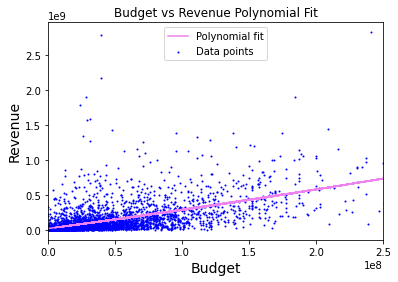

In [410]:
## Scatter Plot version of Budger_adj vs. Revenue_adj with a polynomial (Regression Line) fit 

X_data = df.budget_adj
Y_data = df.revenue_adj

def plot_fit(X, Y):
    params= np.polyfit(X_data, Y_data, deg=2)
    fit = np.polyval(params, X_data)

    fig, ax1 = plt.subplots()
    ax1.scatter(X, Y, s=1, color='b', label='Data points')
    ax1.plot(X, fit, color='violet', alpha=1, label='Polynomial fit')
    
    ax1.set_title('Budget vs Revenue Polynomial Fit')
    plt.xlabel('Budget', fontsize=14)
    plt.ylabel('Revenue', fontsize=14)
    ax1.legend()
    plt.xlim(0, 2.5 * (10**8))
    plt.show()
    
plot_fit(X_data, Y_data)